
# Problem Statment

To predict whether a customer will get the loan from bank or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

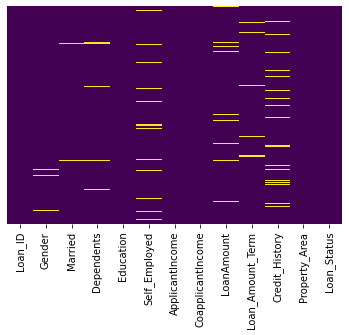

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


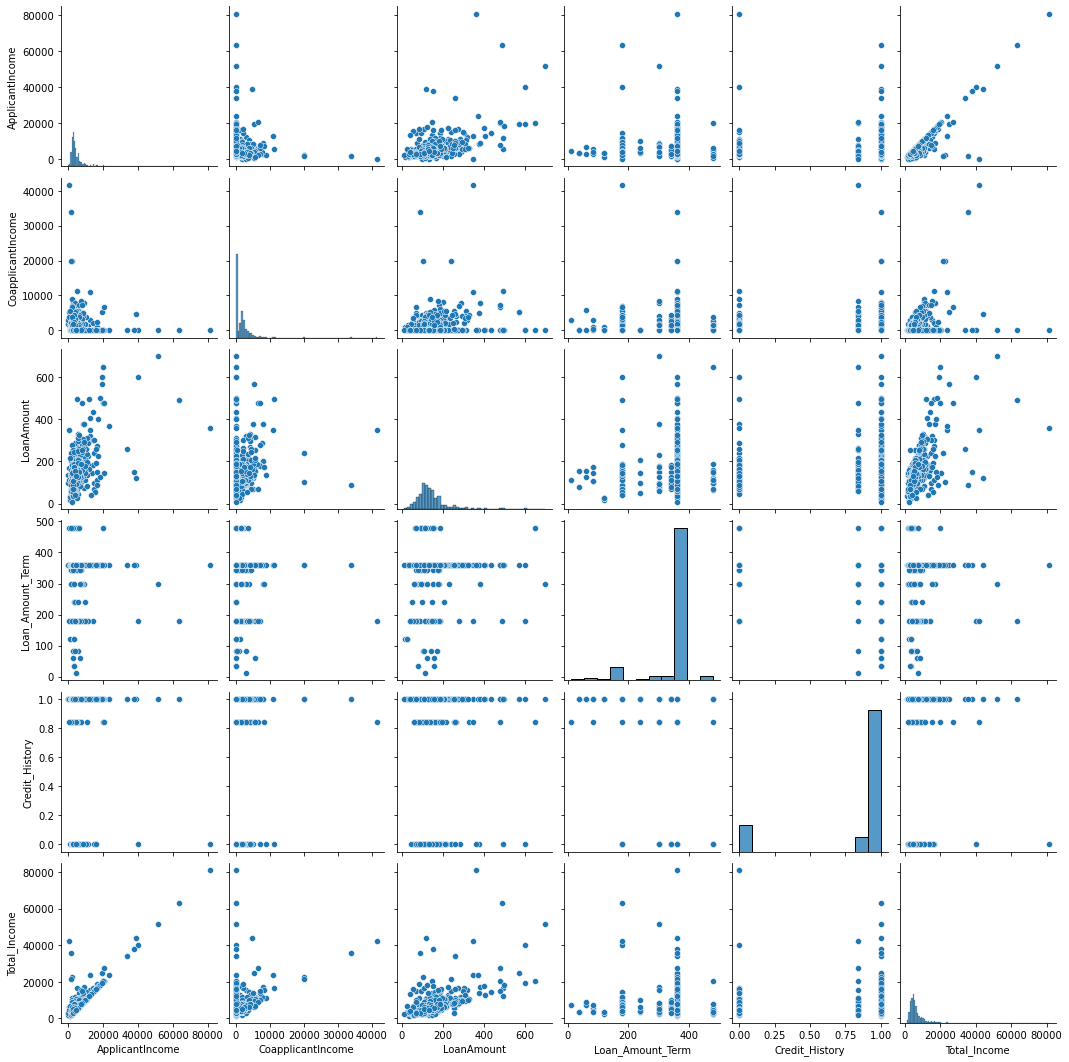

In [14]:
sns.pairplot(df, palette="husl")

In [15]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [16]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})

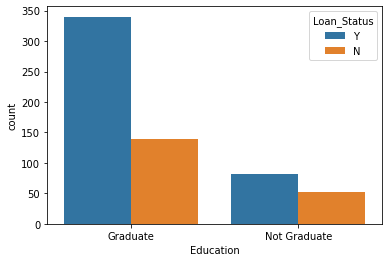

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.show()

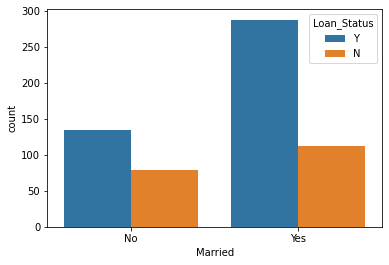

In [19]:
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.show()

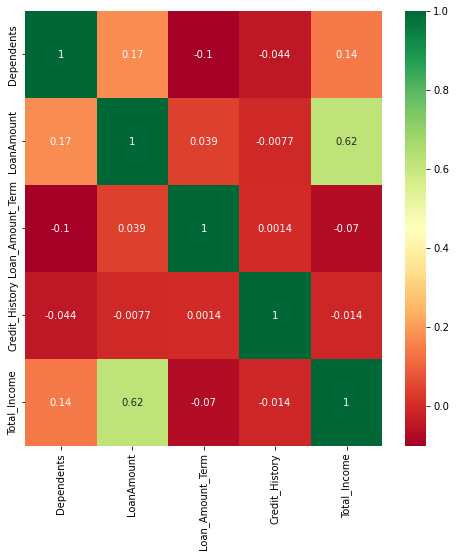

In [20]:
corrmat = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat,annot=True,cmap='RdYlGn')
plt.show()

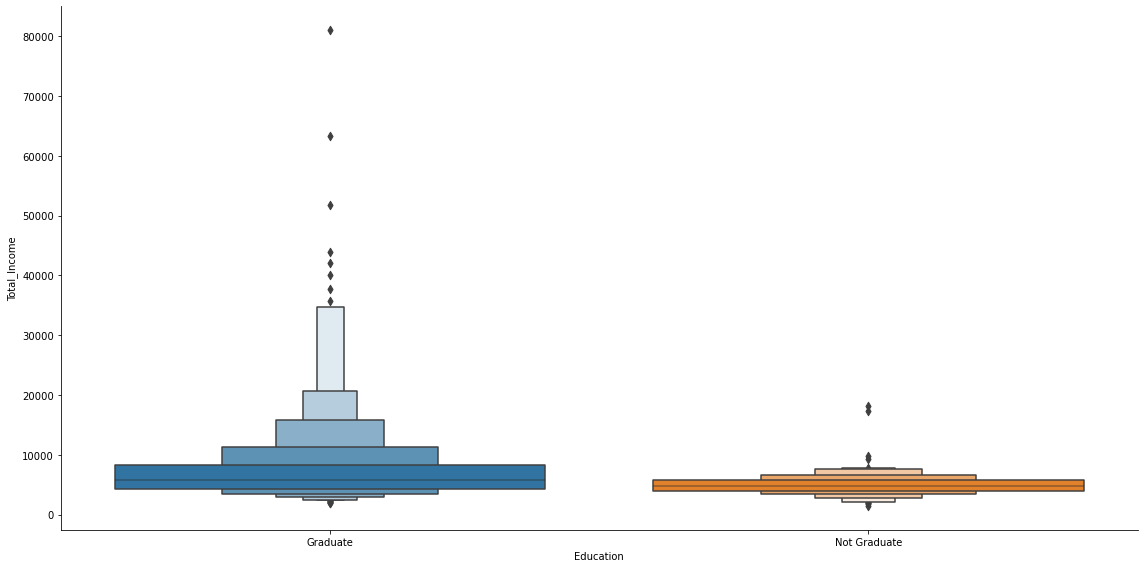

In [21]:

sns.catplot(y = "Total_Income", x = "Education", data = df.sort_values("Total_Income", ascending = False), kind="boxen",height=8,aspect=2)
plt.show()

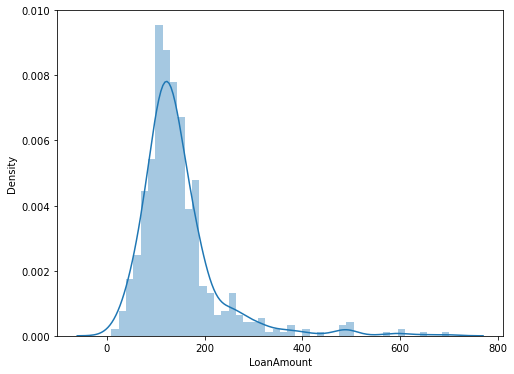

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df["LoanAmount"])
plt.show()

# Label Encoding

In [23]:
df_num = df.select_dtypes([int,float])
df_cat = df.select_dtypes(object)

In [24]:
df_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df_cat:
    le = LabelEncoder()
    df_cat[i] = le.fit_transform(df_cat[i])

In [26]:
df_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1


In [27]:
df1 = pd.concat([df_num,df_cat],axis=1)

In [28]:
df1.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0,146.412162,360.0,1.0,5849.0,1,0,0,0,2,1
1,1,128.000000,360.0,1.0,6091.0,1,1,0,0,0,0
2,0,66.000000,360.0,1.0,3000.0,1,1,0,1,2,1
3,0,120.000000,360.0,1.0,4941.0,1,1,1,0,2,1
4,0,141.000000,360.0,1.0,6000.0,1,0,0,0,2,1


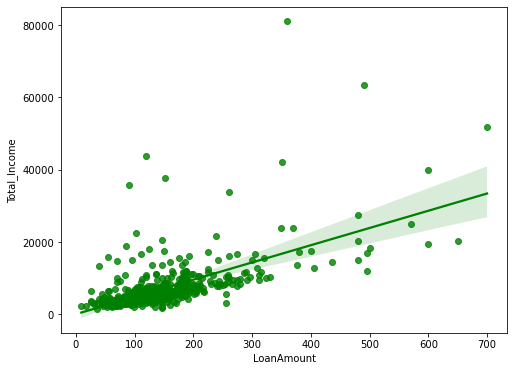

In [37]:
plt.figure(figsize=(8,6))
sns.regplot(y=df['Total_Income'], x=df['LoanAmount'],color='green')
plt.show()

In [38]:
x = df1.iloc[:,:-1]
x

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender,Married,Education,Self_Employed,Property_Area
0,0,146.412162,360.0,1.0,5849.0,1,0,0,0,2
1,1,128.000000,360.0,1.0,6091.0,1,1,0,0,0
2,0,66.000000,360.0,1.0,3000.0,1,1,0,1,2
3,0,120.000000,360.0,1.0,4941.0,1,1,1,0,2
4,0,141.000000,360.0,1.0,6000.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,71.000000,360.0,1.0,2900.0,0,0,0,0,0
610,4,40.000000,180.0,1.0,4106.0,1,1,0,0,0
611,1,253.000000,360.0,1.0,8312.0,1,1,0,0,2
612,2,187.000000,360.0,1.0,7583.0,1,1,0,0,2


In [39]:
y = df1.iloc[:,-1:]
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.metrics import classification_report

In [43]:
lr = LogisticRegression(solver = 'liblinear')
dt = DecisionTreeClassifier(max_depth = 5)
sv = SVC()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [44]:
def model(s):
    s.fit(xtrain,ytrain)
    ypred = s.predict(xtest)
    print(classification_report(ytest,ypred))

In [45]:
model(lr)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [46]:
model(dt)

              precision    recall  f1-score   support

           0       0.89      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185



In [47]:
model(sv)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



In [48]:
model(kn)

              precision    recall  f1-score   support

           0       0.29      0.10      0.15        61
           1       0.66      0.88      0.76       124

    accuracy                           0.62       185
   macro avg       0.48      0.49      0.45       185
weighted avg       0.54      0.62      0.56       185



In [49]:
model(rf)

              precision    recall  f1-score   support

           0       0.71      0.41      0.52        61
           1       0.76      0.92      0.83       124

    accuracy                           0.75       185
   macro avg       0.74      0.66      0.68       185
weighted avg       0.74      0.75      0.73       185



In [50]:
models=[]
models.append(("Logistic Regression",LogisticRegression(solver = 'liblinear')))
models.append(("Decision Tree",DecisionTreeClassifier(max_depth=5)))
models.append(("Random Forest",RandomForestClassifier(n_estimators=50,max_depth=5)))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))

In [51]:
scoring='accuracy'

In [52]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [53]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=1,shuffle=True)
    cv_result=cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

LogisticRegression(solver='liblinear')
Logistic Regression 0.815615
DecisionTreeClassifier(max_depth=5)
Decision Tree 0.783112
RandomForestClassifier(max_depth=5, n_estimators=50)
Random Forest 0.820321
SVC()
Support Vector Classifier 0.692082
KNeighborsClassifier()
K- Neirest Neighbour 0.647785
